<a href="https://colab.research.google.com/github/VMohanraj27/ScofieldReese/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   horizontal_flip=True,
                                   height_shift_range=0.3,
                                   width_shift_range=0.3,
                                   shear_range=0.2)

In [53]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Breast Cancer Patients MRI's/train",
                                                    target_size=(32,32),
                                                    class_mode='binary',
                                                    batch_size=32)

Found 1078 images belonging to 2 classes.


In [54]:
valid_datagen = ImageDataGenerator(rescale=1/255)

In [55]:
valid_generator = valid_datagen.flow_from_directory("/content/drive/MyDrive/Breast Cancer Patients MRI's/validation",
                                                    target_size=(32,32),
                                                    class_mode='binary',
                                                    batch_size=32)

Found 402 images belonging to 2 classes.


In [56]:
imgs,labels = next(train_generator)
num_classes = len(train_generator.class_indices)

In [57]:
def plot_images(images_arr):
  fig,axes = plt.subplots(1,12,figsize=(32,32))
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

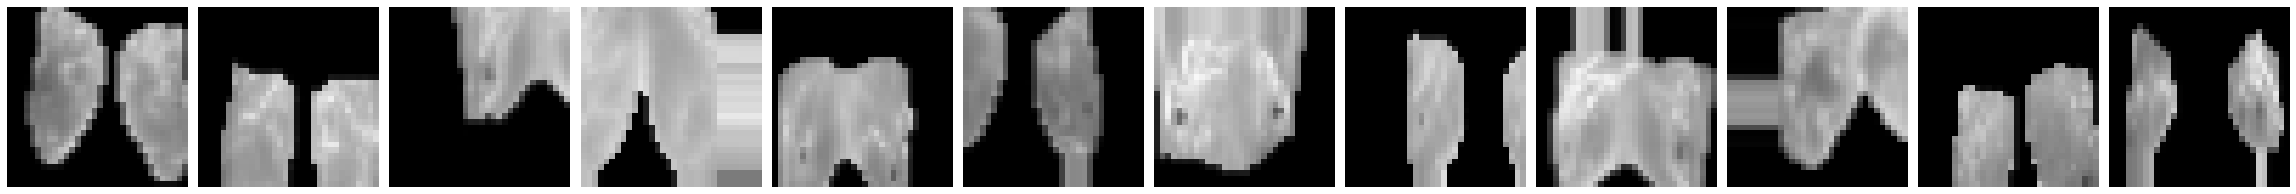

[1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0.]


In [58]:
plot_images(imgs)
print(labels)

In [59]:
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential

In [60]:
model = Sequential()

In [61]:
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=[32,32,3]))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [62]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [63]:
model.add(Flatten())

In [64]:
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile(optimizer='RMSprop', 
              loss='binary_crossentropy', 
              metrics=['Accuracy'])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 15, 15, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                      

In [ ]:
history = model.fit(x=train_generator, 
          batch_size=32, 
          epochs=25, 
          validation_data=valid_generator,
          steps_per_epoch=train_generator.n//train_generator.batch_size,)

Epoch 1/25
33/33 [==============================] - 6s 151ms/step - loss: 1.3647 - Accuracy: 0.5449 - val_loss: 0.6898 - val_Accuracy: 0.5547
Epoch 2/25
33/33 [==============================] - 3s 101ms/step - loss: 0.7171 - Accuracy: 0.5660 - val_loss: 0.6849 - val_Accuracy: 0.5846
Epoch 3/25
33/33 [==============================] - 3s 101ms/step - loss: 0.7069 - Accuracy: 0.5765 - val_loss: 0.9935 - val_Accuracy: 0.5000
Epoch 4/25
33/33 [==============================] - 3s 102ms/step - loss: 0.6814 - Accuracy: 0.5946 - val_loss: 0.7369 - val_Accuracy: 0.5000
Epoch 5/25
33/33 [==============================] - 3s 103ms/step - loss: 0.6503 - Accuracy: 0.6644 - val_loss: 0.9166 - val_Accuracy: 0.5000
Epoch 6/25
33/33 [==============================] - 3s 104ms/step - loss: 0.6330 - Accuracy: 0.6730 - val_loss: 1.3855 - val_Accuracy: 0.5000
Epoch 7/25
33/33 [==============================] - 3s 103ms/step - loss: 0.6143 - Accuracy: 0.6759 - val_loss: 2.4138 - val_Accuracy: 0.5000
Epoch 

In [ ]:
def plot_graphs(history,string):
  plt.plot(history.history[string], 'b-x', linewidth=3)
  plt.plot(history.history['val_'+string], 'r-o', linewidth=3)
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

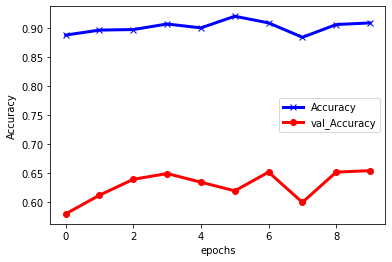

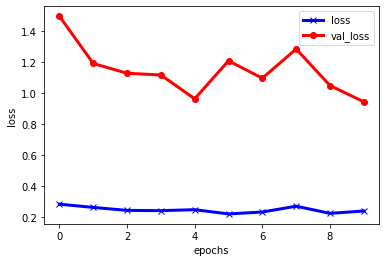

In [ ]:
plot_graphs(history,'Accuracy')
plot_graphs(history,'loss')

In [ ]:
import os

In [ ]:
test_filenames = os.listdir(r"/content/drive/MyDrive/test_BC")
test_df = pd.DataFrame({
    "Filename" : test_filenames
})

In [ ]:
total_test = len(test_df)
print('Total Number of images:',total_test)

Total Number of images: 43


In [ ]:
test1_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
test1_generator = test1_datagen.flow_from_dataframe(test_df,r"/content/drive/MyDrive/test_BC",
                                                    x_col='Filename',
                                                    class_mode=None,
                                                    target_size=(32,32),
                                                    batch_size=10)

Found 43 validated image filenames.


In [ ]:
batch_size=10

In [ ]:
predict = model.predict(test1_generator)
                        
print("Number of predicted images:", len(predict), "\n")
print(predict)

Number of predicted images: 43 

[[0.49732938]
 [0.02925536]
 [0.03272564]
 [0.03107175]
 [0.03172716]
 [0.05835023]
 [0.48452073]
 [0.37574562]
 [0.05087343]
 [0.02876954]
 [0.09269885]
 [0.03378184]
 [0.48260525]
 [0.00813013]
 [0.2657308 ]
 [0.9208635 ]
 [0.06529935]
 [0.07313556]
 [0.7702283 ]
 [0.29202858]
 [0.9157761 ]
 [0.05950642]
 [0.33477828]
 [0.02554499]
 [0.26475105]
 [0.02862913]
 [0.62570876]
 [0.04437299]
 [0.14495347]
 [0.05398539]
 [0.03025205]
 [0.36450544]
 [0.6410745 ]
 [0.1208608 ]
 [0.07730408]
 [0.01398547]
 [0.03210748]
 [0.30025095]
 [0.02865177]
 [0.6335965 ]
 [0.10523515]
 [0.93303263]
 [0.58381987]]


In [ ]:
results_df['probabilities'] = pd.DataFrame(predict)

In [ ]:
results_df

,0,round_off,probabilities
0,0.497329,0.0,0.497329
1,0.029255,0.0,0.029255
2,0.032726,0.0,0.032726
3,0.031072,0.0,0.031072
4,0.031727,0.0,0.031727


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path,target_size=(32,32))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a malignant")
  else:
    print(fn + " is a beningn")

Saving H_1.jpg to H_1 (1).jpg
[0.]
H_1.jpgis a beningn
